# Plano atual do projeto:

1ª semana) Análise exploratória: olhar dados estruturados e observar tendências e sua lógica. Ex.: localização, nº candidatos, tipo de local de trabalho, habilidades requeridas, nível da vaga, setor da companhia.

2ª semana) Uso de NLP (BerTopic): modelo de tópicos usado com os dados do campo description
- https://maartengr.github.io/BERTopic/index.html

3ª semana) Análise cruzada entre tópicos mapeados com NLP e a análise exploratória / Uso de Langchain para categorizar e possivelmente corrigir nomes de posições inadequadas conforme a análise
- https://python.langchain.com/en/latest/

In [485]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [486]:
# Obtaining the data frmo all the archives extracted from Linkedin
df_jobs = pd.DataFrame()
for job in os.listdir('data'):
    if job[-4:] == '.csv':
        new_df = pd.read_csv(f'data/{job}', sep=';')
        df_jobs = pd.concat([df_jobs, new_df], axis=0)

# Initial Analysis

In [487]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4486 entries, 0 to 937
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   position                4486 non-null   object 
 1   company                 4486 non-null   object 
 2   location                4486 non-null   object 
 3   posted_date             4482 non-null   object 
 4   no_applicants           3016 non-null   object 
 5   date_collected          4486 non-null   object 
 6   type_workplace          3877 non-null   object 
 7   required_skills         4269 non-null   object 
 8   competitive_advantages  0 non-null      float64
 9   level                   3766 non-null   object 
 10  worktype                4486 non-null   object 
 11  description             4486 non-null   object 
 12  link_application        4486 non-null   object 
 13  link_linkedin           4486 non-null   object 
 14  company_name            4482 non-null   object

In [488]:
df_jobs.describe()

,competitive_advantages
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [489]:
df_jobs.shape

(4486, 17)

In [490]:
df_jobs.head()

,position,company,location,posted_date,no_applicants,date_collected,type_workplace,required_skills,competitive_advantages,level,worktype,description,link_application,link_linkedin,company_name,company_size,company_sector
0,Analista de Gestão de Dados,"{'name': 'Moove', 'size': '1.001-5.000 funcion...","São Paulo, São Paulo, Brasil",2023-06-02 15:06:50.791991,NaN,2023-06-05 15:06:50.800990,Híbrido,"['SQL', 'Alteryx', 'Azure Data Factory', 'Azur...",NaN,NaN,Tempo integral,Sobre a vaga\nPosição: Analista de Gestão de D...,https://www.linkedin.com/jobs/view/3624224677/...,https://www.linkedin.com/jobs/view/3624224677/...,Moove,1.001-5.000 funcionários,NaN
1,Marketing Data Analyst,"{'name': 'Valtech', 'size': '5.001-10.000 func...",São Paulo e Região,2023-05-29 15:06:57.048773,77 candidaturas,2023-06-05 15:06:57.059778,NaN,"['Analítica', 'Analítica de dados', 'Análise d...",NaN,Pleno-sênior,Tempo integral,Sobre a vaga\nA Valtech é uma Agência Digital ...,https://careers.brazil.valtech.com/jobs/272791...,https://www.linkedin.com/jobs/view/3613520213/...,Valtech,5.001-10.000 funcionários,Serviços e consultoria de TI
2,Football Statistician,"{'name': 'Genius Sports', 'size': '1.001-5.000...","Crateús, Ceará, Brasil",2023-05-29 15:07:01.909347,47 candidaturas,2023-06-05 15:07:01.919349,Presencial,"['Esportes', 'Futebol americano', 'Inglês', 'I...",NaN,Assistente,Contrato,Sobre a vaga\nLove sports?\n\nWe're looking fo...,https://boards.greenhouse.io/geniussports/jobs...,https://www.linkedin.com/jobs/view/3580156456/...,Genius Sports,1.001-5.000 funcionários,Desenvolvimento de software
3,­­­Analista Privacidade de Dados Sr – Prazo De...,"{'name': 'CPFL Energia', 'size': '5.001-10.000...","Campinas, São Paulo, Brasil",2023-05-29 15:07:15.555500,98 candidaturas,2023-06-05 15:07:15.567136,Presencial,"['Análise de dados', 'Microsoft Excel', 'Avali...",NaN,NaN,Tempo integral,Sobre a vaga\nAnalista Privacidade de Dados Sr...,https://career19.sapsf.com/sfcareer/jobreqcare...,https://www.linkedin.com/jobs/view/3613286152/...,CPFL Energia,5.001-10.000 funcionários,"Serviços de eletricidade, gás, água e esgoto"
4,ANALISTA CADASTRO JR,"{'name': 'AkzoNobel', 'size': '+ de 10.001 fun...","Mauá, São Paulo, Brasil",2023-06-03 15:07:28.657900,101 candidaturas,2023-06-05 15:07:28.678311,Presencial,"['Comunicação', 'Análise de negócios', 'Aprese...",NaN,NaN,Tempo integral,Sobre a vaga\nSomos pioneiros em um mundo de p...,https://careers.akzonobel.com/job/ANALISTA-CAD...,https://www.linkedin.com/jobs/view/3621326350/...,AkzoNobel,+ de 10.001 funcionários,Fabricação de produtos químicos


In [491]:
df_jobs.tail()

,position,company,location,posted_date,no_applicants,date_collected,type_workplace,required_skills,competitive_advantages,level,worktype,description,link_application,link_linkedin,company_name,company_size,company_sector
933,Developer ServiceNow ITOM/ITAM,"{'name': 'Wipro', 'size': '+ de 10.001 funcion...","São Paulo, Brasil",2023-06-01 08:52:10.098846,69 candidaturas,2023-06-06 08:52:10.117914,Remoto,"['Articulação (TI)', 'CAD', 'Certificação ITIL...",NaN,Pleno-sênior,Tempo integral,"Sobre a vaga\nNós somos a Wipro, uma empresa d...",https://www.linkedin.com/jobs/view/3621704573/...,https://www.linkedin.com/jobs/view/3621704573/...,Wipro,+ de 10.001 funcionários,Serviços e consultoria de TI
934,SRE Specialist,"{'name': 'Dock', 'size': '1.001-5.000 funcioná...",Brasil,2023-05-30 08:52:13.172745,48 candidaturas,2023-06-06 08:52:13.182745,Remoto,['SRE (Engenharia de confiabilidade do site)'],NaN,Assistente,Tempo integral,Sobre a vaga\nJob Description\n\nNa Dock você ...,https://dock.gupy.io/job/eyJzb3VyY2UiOiJndXB5X...,https://www.linkedin.com/jobs/view/3615812605/...,Dock,1.001-5.000 funcionários,Serviços e consultoria de TI
935,Estágio em Desenvolvimento Python,"{'name': '4mti Soluções Ltda.', 'size': 'Veja ...","Belo Horizonte, Minas Gerais, Brasil",2023-05-06 08:52:18.782909,52 candidaturas,2023-06-06 08:52:18.800424,Híbrido,NaN,NaN,Estágio,Tempo integral,Sobre a vaga\nEsta vaga foi obtida de um site ...,https://www.catho.com.br/vagas/linkedin/22518973/,https://www.linkedin.com/jobs/view/3608512751/...,4mti Soluções Ltda.,Veja como você se compara a 52 candidatos. Exp...,NaN
936,Consultor(a) FullStack,"{'name': 'Avanade', 'size': '+ de 10.001 funci...","São Paulo, São Paulo, Brasil",2023-05-23 08:52:32.592300,54 candidaturas,2023-06-06 08:52:32.617668,NaN,"['Comunicação', 'Estruturas de dados', 'Lingua...",NaN,Pleno-sênior,Tempo integral,Sobre a vaga\nJob Description\n\nConsultor(a) ...,https://careers.avanade.com/jobsenus/JobDetail...,https://www.linkedin.com/jobs/view/3588922575/...,Avanade,+ de 10.001 funcionários,Serviços e consultoria de TI
937,Senior Data Engineer - DSP for Vibration Analysis,"{'name': 'TRACTIAN', 'size': '51-200 funcionár...",Brasil,2023-05-16 08:52:41.297504,42 candidaturas,2023-06-06 08:52:41.326710,Remoto,"['NoSQL', 'Python', 'SQL', 'Amazon S3', 'Amazo...",NaN,Pleno-sênior,Tempo integral,Sobre a vaga\nWhat you'll do\n\nWe are looking...,https://tractian.com/carreiras/vagas/recwwW4gV...,https://www.linkedin.com/jobs/view/3602652766/...,TRACTIAN,51-200 funcionários,Desenvolvimento de software


In [492]:
df_jobs.sample(5)

,position,company,location,posted_date,no_applicants,date_collected,type_workplace,required_skills,competitive_advantages,level,worktype,description,link_application,link_linkedin,company_name,company_size,company_sector
576,Estágio Programador - Junior,"{'name': 'SYSC System Control CEE Ltda', 'size...","São Paulo, São Paulo, Brasil",2023-05-05 20:46:16.925820,NaN,2023-06-05 20:46:16.934696,Presencial,NaN,NaN,Assistente,Tempo integral,Sobre a vaga\nEsta vaga foi obtida de um site ...,https://boards.greenhouse.io/launchpadtechnolo...,https://www.linkedin.com/jobs/view/3574849124/...,SYSC System Control CEE Ltda,Veja como você se compara a 376 candidatos. Ex...,NaN
2,Football Statistician,"{'name': 'Genius Sports', 'size': '1.001-5.000...","Crateús, Ceará, Brasil",2023-05-29 15:07:01.909347,47 candidaturas,2023-06-05 15:07:01.919349,Presencial,"['Esportes', 'Futebol americano', 'Inglês', 'I...",NaN,Assistente,Contrato,Sobre a vaga\nLove sports?\n\nWe're looking fo...,https://boards.greenhouse.io/geniussports/jobs...,https://www.linkedin.com/jobs/view/3580156456/...,Genius Sports,1.001-5.000 funcionários,Desenvolvimento de software
471,BAI Services Sr Analyst,"{'name': 'Mars', 'size': '+ de 10.001 funcioná...","Guararema, São Paulo, Brasil",2023-05-15 16:52:54.195655,37 candidaturas,2023-06-05 16:52:54.230031,Híbrido,"['BizTalk', 'Fila de mensagens', 'Gestão de co...",NaN,Pleno-sênior,Tempo integral,Sobre a vaga\nJob Description:\nThis role is f...,https://mars.wd3.myworkdayjobs.com/External/jo...,https://www.linkedin.com/jobs/view/3597405362/...,Mars,+ de 10.001 funcionários,Indústrias de transformação
119,Cientista Associado II,"{'name': 'Syngenta', 'size': '+ de 10.001 func...",Brasil,2023-05-30 07:32:30.542542,190 candidaturas,2023-06-06 07:32:30.554538,Híbrido,"['Comunicação', 'Biologia', 'Boas práticas de ...",NaN,Júnior,Tempo integral,Sobre a vaga\nDescrição da empresa\n\nA Syngen...,https://jobs.smartrecruiters.com/SyngentaGroup...,https://www.linkedin.com/jobs/view/3614651355/...,Syngenta,+ de 10.001 funcionários,Agricultura
66,Cientista de Dados Pleno - Ênfase em Tableau |...,"{'name': 'Deloitte', 'size': '+ de 10.001 func...","São Paulo, São Paulo, Brasil",2023-06-01 20:05:07.160007,30 candidaturas,2023-06-05 20:05:07.171993,Presencial,"['Analítica de dados', 'Ciência de dados', 'En...",NaN,Assistente,Tempo integral,Sobre a vaga\nDescription\n\nConsultor(a) Plen...,https://jobs.jobconvo.com/job/MjAzNTUzNw-consu...,https://www.linkedin.com/jobs/view/3624858971/...,Deloitte,+ de 10.001 funcionários,Consultoria e serviços empresariais


In [493]:
total_na = df_jobs.isna().sum()
perc_na = total_na / len(df_jobs)
pd.concat([total_na, perc_na], axis=1).rename({0: 'Total NA', 1: 'Perc. NA'}, axis=1).sort_values(by='Perc. NA', ascending=False)

,Total NA,Perc. NA
competitive_advantages,4486,1.000000
no_applicants,1470,0.327686
level,720,0.160499
type_workplace,609,0.135756
required_skills,217,0.048373
company_sector,183,0.040794
posted_date,4,0.000892
company_name,4,0.000892
date_collected,0,0.000000
company,0,0.000000


# Treating the data

In [494]:
df_jobs = df_jobs.reset_index()
df_jobs = df_jobs.drop(['index'], axis=1)
df_jobs.head(2)

,position,company,location,posted_date,no_applicants,date_collected,type_workplace,required_skills,competitive_advantages,level,worktype,description,link_application,link_linkedin,company_name,company_size,company_sector
0,Analista de Gestão de Dados,"{'name': 'Moove', 'size': '1.001-5.000 funcion...","São Paulo, São Paulo, Brasil",2023-06-02 15:06:50.791991,NaN,2023-06-05 15:06:50.800990,Híbrido,"['SQL', 'Alteryx', 'Azure Data Factory', 'Azur...",NaN,NaN,Tempo integral,Sobre a vaga\nPosição: Analista de Gestão de D...,https://www.linkedin.com/jobs/view/3624224677/...,https://www.linkedin.com/jobs/view/3624224677/...,Moove,1.001-5.000 funcionários,NaN
1,Marketing Data Analyst,"{'name': 'Valtech', 'size': '5.001-10.000 func...",São Paulo e Região,2023-05-29 15:06:57.048773,77 candidaturas,2023-06-05 15:06:57.059778,NaN,"['Analítica', 'Analítica de dados', 'Análise d...",NaN,Pleno-sênior,Tempo integral,Sobre a vaga\nA Valtech é uma Agência Digital ...,https://careers.brazil.valtech.com/jobs/272791...,https://www.linkedin.com/jobs/view/3613520213/...,Valtech,5.001-10.000 funcionários,Serviços e consultoria de TI


In [495]:
# Dropping columns
to_drop_cols = ['competitive_advantages', 'company']
df_jobs = df_jobs.drop(to_drop_cols, axis=1)
df_jobs

,position,location,posted_date,no_applicants,date_collected,type_workplace,required_skills,level,worktype,description,link_application,link_linkedin,company_name,company_size,company_sector
0,Analista de Gestão de Dados,"São Paulo, São Paulo, Brasil",2023-06-02 15:06:50.791991,NaN,2023-06-05 15:06:50.800990,Híbrido,"['SQL', 'Alteryx', 'Azure Data Factory', 'Azur...",NaN,Tempo integral,Sobre a vaga\nPosição: Analista de Gestão de D...,https://www.linkedin.com/jobs/view/3624224677/...,https://www.linkedin.com/jobs/view/3624224677/...,Moove,1.001-5.000 funcionários,NaN
1,Marketing Data Analyst,São Paulo e Região,2023-05-29 15:06:57.048773,77 candidaturas,2023-06-05 15:06:57.059778,NaN,"['Analítica', 'Analítica de dados', 'Análise d...",Pleno-sênior,Tempo integral,Sobre a vaga\nA Valtech é uma Agência Digital ...,https://careers.brazil.valtech.com/jobs/272791...,https://www.linkedin.com/jobs/view/3613520213/...,Valtech,5.001-10.000 funcionários,Serviços e consultoria de TI
2,Football Statistician,"Crateús, Ceará, Brasil",2023-05-29 15:07:01.909347,47 candidaturas,2023-06-05 15:07:01.919349,Presencial,"['Esportes', 'Futebol americano', 'Inglês', 'I...",Assistente,Contrato,Sobre a vaga\nLove sports?\n\nWe're looking fo...,https://boards.greenhouse.io/geniussports/jobs...,https://www.linkedin.com/jobs/view/3580156456/...,Genius Sports,1.001-5.000 funcionários,Desenvolvimento de software
3,­­­Analista Privacidade de Dados Sr – Prazo De...,"Campinas, São Paulo, Brasil",2023-05-29 15:07:15.555500,98 candidaturas,2023-06-05 15:07:15.567136,Presencial,"['Análise de dados', 'Microsoft Excel', 'Avali...",NaN,Tempo integral,Sobre a vaga\nAnalista Privacidade de Dados Sr...,https://career19.sapsf.com/sfcareer/jobreqcare...,https://www.linkedin.com/jobs/view/3613286152/...,CPFL Energia,5.001-10.000 funcionários,"Serviços de eletricidade, gás, água e esgoto"
4,ANALISTA CADASTRO JR,"Mauá, São Paulo, Brasil",2023-06-03 15:07:28.657900,101 candidaturas,2023-06-05 15:07:28.678311,Presencial,"['Comunicação', 'Análise de negócios', 'Aprese...",NaN,Tempo integral,Sobre a vaga\nSomos pioneiros em um mundo de p...,https://careers.akzonobel.com/job/ANALISTA-CAD...,https://www.linkedin.com/jobs/view/3621326350/...,AkzoNobel,+ de 10.001 funcionários,Fabricação de produtos químicos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,Developer ServiceNow ITOM/ITAM,"São Paulo, Brasil",2023-06-01 08:52:10.098846,69 candidaturas,2023-06-06 08:52:10.117914,Remoto,"['Articulação (TI)', 'CAD', 'Certificação ITIL...",Pleno-sênior,Tempo integral,"Sobre a vaga\nNós somos a Wipro, uma empresa d...",https://www.linkedin.com/jobs/view/3621704573/...,https://www.linkedin.com/jobs/view/3621704573/...,Wipro,+ de 10.001 funcionários,Serviços e consultoria de TI
4482,SRE Specialist,Brasil,2023-05-30 08:52:13.172745,48 candidaturas,2023-06-06 08:52:13.182745,Remoto,['SRE (Engenharia de confiabilidade do site)'],Assistente,Tempo integral,Sobre a vaga\nJob Description\n\nNa Dock você ...,https://dock.gupy.io/job/eyJzb3VyY2UiOiJndXB5X...,https://www.linkedin.com/jobs/view/3615812605/...,Dock,1.001-5.000 funcionários,Serviços e consultoria de TI
4483,Estágio em Desenvolvimento Python,"Belo Horizonte, Minas Gerais, Brasil",2023-05-06 08:52:18.782909,52 candidaturas,2023-06-06 08:52:18.800424,Híbrido,NaN,Estágio,Tempo integral,Sobre a vaga\nEsta vaga foi obtida de um site ...,https://www.catho.com.br/vagas/linkedin/22518973/,https://www.linkedin.com/jobs/view/3608512751/...,4mti Soluções Ltda.,Veja como você se compara a 52 candidatos. Exp...,NaN
4484,Consultor(a) FullStack,"São Paulo, São Paulo, Brasil",2023-05-23 08:52:32.592300,54 candidaturas,2023-06-06 08:52:32.617668,NaN,"['Comunicação', 'Estruturas de dados', 'Lingua...",Pleno-sênior,Tempo integral,Sobre a vaga\nJob Description\n\nConsultor(a) ...,https://careers.avanade.com/jobsenus/JobDetail...,https://www.linkedin.com/jobs/view/3588922575/...,Avanade,+ de 10.001 funcionários,Serviços e consultoria de TI


In [496]:
# Dropping rows
df_jobs = df_jobs.dropna(axis=0, subset=['posted_date', 'company_name'])
total_na = df_jobs.isna().sum()
perc_na = total_na / len(df_jobs)
pd.concat([total_na, perc_na], axis=1).rename({0: 'Total NA', 1: 'Perc. NA'}, axis=1).sort_values(by='Perc. NA', ascending=False)

,Total NA,Perc. NA
no_applicants,1467,0.327602
level,718,0.160339
type_workplace,609,0.135998
required_skills,217,0.048459
company_sector,182,0.040643
position,0,0.000000
location,0,0.000000
posted_date,0,0.000000
date_collected,0,0.000000
worktype,0,0.000000


In [497]:
df_jobs.shape

(4478, 15)

In [498]:
# Evaluating duplicates
cols_duplication = ['company_name', 'position', 'location']
mask_duplicates = df_jobs[cols_duplication].duplicated()
print(df_jobs[mask_duplicates].shape)
df_jobs = df_jobs[~mask_duplicates]
print(df_jobs.shape)

(2194, 15)
(2284, 15)


In [499]:
# Transforming the data
df_jobs.columns

Index(['position', 'location', 'posted_date', 'no_applicants',
       'date_collected', 'type_workplace', 'required_skills', 'level',
       'worktype', 'description', 'link_application', 'link_linkedin',
       'company_name', 'company_size', 'company_sector'],
      dtype='object')

In [500]:
# Location:
df_jobs.location.value_counts()

location
São Paulo, São Paulo, Brasil               636
Brasil                                     273
São Paulo, Brasil                          189
Rio de Janeiro, Rio de Janeiro, Brasil      93
São Paulo e Região                          87
                                          ... 
Nova Mutum, Mato Grosso, Brasil              1
Serra, Espírito Santo, Brasil                1
Sapezal, Mato Grosso, Brasil                 1
Primavera do Leste, Mato Grosso, Brasil      1
Lençóis Paulista, São Paulo, Brasil          1
Name: count, Length: 240, dtype: int64

In [501]:
mask_has_comma = df_jobs['location'].str.contains(', ')
df_jobs['city'] = df_jobs[mask_has_comma].location.map(lambda x: x.split(', ')[0])
df_jobs.loc[~mask_has_comma, 'city'] = df_jobs[~mask_has_comma].location.map(lambda x: x if 'Região' in x else np.nan)
df_jobs['state'] = df_jobs[mask_has_comma].location.map(lambda x: x.split(', ')[1] if x.split(', ')[1] != 'Brasil' else np.nan)
df_jobs['country'] = df_jobs[mask_has_comma].location.map(lambda x: x.split(', ')[-1])
df_jobs.loc[df_jobs['location'] == 'Brasil', 'country'] = 'Brasil'

In [502]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2284 entries, 0 to 4484
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   position          2284 non-null   object
 1   location          2284 non-null   object
 2   posted_date       2284 non-null   object
 3   no_applicants     1508 non-null   object
 4   date_collected    2284 non-null   object
 5   type_workplace    2026 non-null   object
 6   required_skills   2164 non-null   object
 7   level             1859 non-null   object
 8   worktype          2284 non-null   object
 9   description       2284 non-null   object
 10  link_application  2284 non-null   object
 11  link_linkedin     2284 non-null   object
 12  company_name      2284 non-null   object
 13  company_size      2284 non-null   object
 14  company_sector    2157 non-null   object
 15  city              2005 non-null   object
 16  state             1624 non-null   object
 17  country           2

In [503]:
# Dtype conversion
df_jobs['posted_date'] = pd.to_datetime(df_jobs['posted_date'].str[:10])

In [504]:
df_jobs['date_collected'] = pd.to_datetime(df_jobs['date_collected'])

In [505]:
df_jobs.no_applicants.value_counts()

no_applicants
3 candidaturas      28
11 candidaturas     27
1 candidatura       25
2 candidaturas      24
14 candidaturas     23
                    ..
172 candidaturas     1
166 candidaturas     1
187 candidaturas     1
181 candidaturas     1
169 candidaturas     1
Name: count, Length: 195, dtype: int64

In [506]:
df_jobs['no_applicants'] = df_jobs[df_jobs['no_applicants'].notna()].no_applicants.map(lambda x: x.split()[0]).astype('float')

In [507]:
df_jobs.describe()

,posted_date,no_applicants,date_collected
count,2284,1508.000000,2284
mean,2023-05-23 02:57:47.600700416,65.266578,2023-06-05 23:24:06.303689984
min,2022-10-05 00:00:00,1.000000,2023-06-05 15:06:50.800990
25%,2023-05-22 00:00:00,20.000000,2023-06-05 16:58:21.155207936
50%,2023-05-29 00:00:00,51.000000,2023-06-05 20:19:13.165731584
75%,2023-05-31 00:00:00,100.000000,2023-06-06 08:15:27.124396544
max,2023-06-06 00:00:00,200.000000,2023-06-06 10:53:49.980937
std,NaN,53.269362,NaN


# Exploring the data

In [513]:
df_jobs.columns

Index(['position', 'location', 'posted_date', 'no_applicants',
       'date_collected', 'type_workplace', 'required_skills', 'level',
       'worktype', 'description', 'link_application', 'link_linkedin',
       'company_name', 'company_size', 'company_sector', 'city', 'state',
       'country'],
      dtype='object')

In [582]:
df_jobs.worktype.value_counts()
mask_worktype_inadequate = (df_jobs['worktype'].str.contains('/month')) | (df_jobs['worktype'].str.contains('funcionários'))
df_jobs = df_jobs.drop(df_jobs[mask_worktype_inadequate].index, axis=0)

In [609]:
workplace_counts = df_jobs.groupby('type_workplace')[['position']].count().reset_index().sort_values(ascending=False, by='position').head(10)
worktype_counts = df_jobs.groupby('worktype')[['position']].count().reset_index().sort_values(ascending=False, by='position').head(10)
level_counts = df_jobs.groupby('level')[['position']].count().reset_index().sort_values(ascending=False, by='position').head(10)
company_sector_counts = df_jobs.groupby('company_sector')[['position']].count().reset_index().sort_values(ascending=False, by='position').head(10)
city_counts = df_jobs.groupby('city')[['position']].count().reset_index().sort_values(ascending=False, by='position').head(10)
state_counts = df_jobs.groupby('state')[['position']].count().reset_index().sort_values(ascending=False, by='position').head(10)
country_counts = df_jobs.groupby('country')[['position']].count().reset_index().sort_values(ascending=False, by='position').head(10)

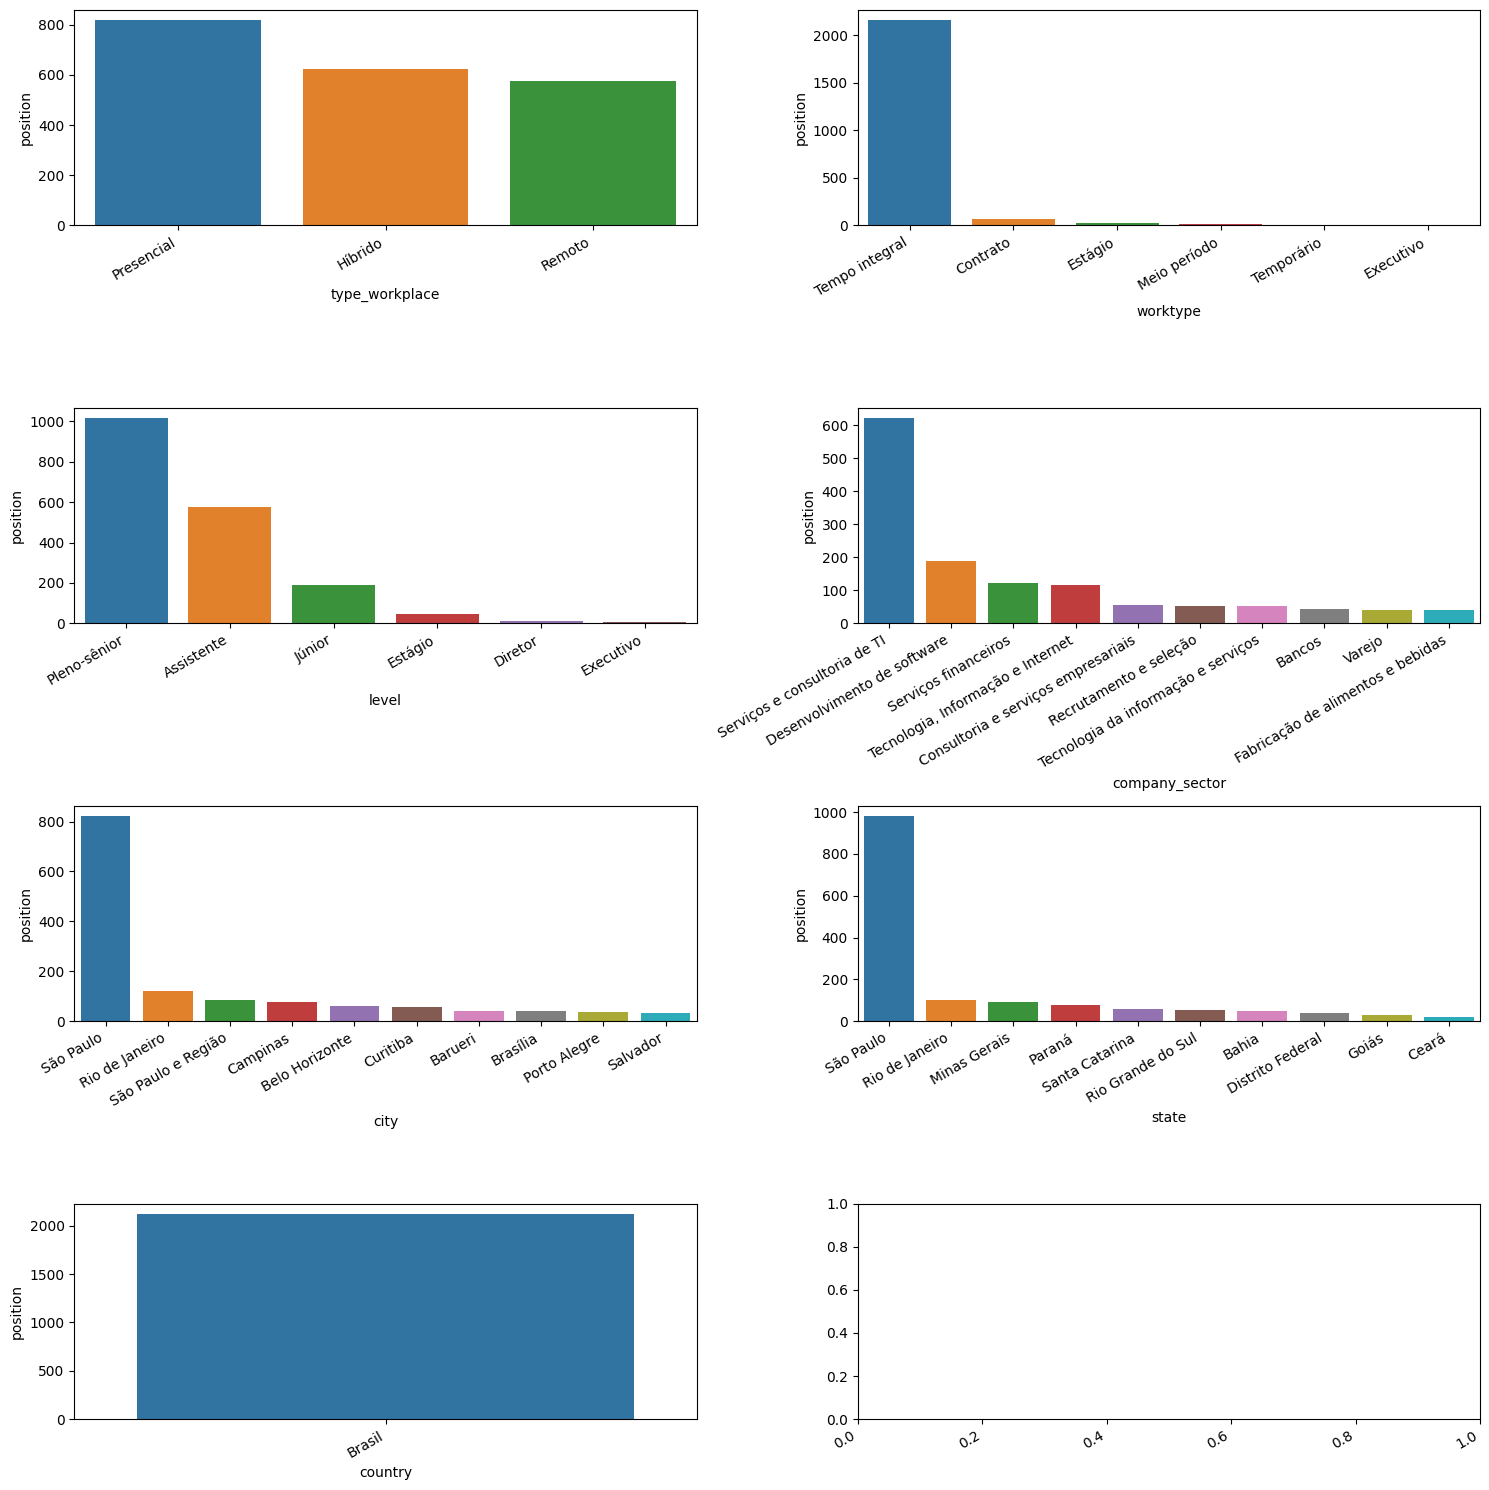

In [611]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
sns.barplot(data=workplace_counts, x='type_workplace', y='position', ax=ax[0][0])
sns.barplot(data=worktype_counts, x='worktype', y='position', ax=ax[0][1])
sns.barplot(data=level_counts, x='level', y='position', ax=ax[1][0])
sns.barplot(data=company_sector_counts, x='company_sector', y='position', ax=ax[1][1])
sns.barplot(data=city_counts, x='city', y='position', ax=ax[2][0])
sns.barplot(data=state_counts, x='state', y='position', ax=ax[2][1])
sns.barplot(data=country_counts, x='country', y='position', ax=ax[3][0])
for i in ax:
    for j in i:
        plt.setp(j.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()

<Axes: >

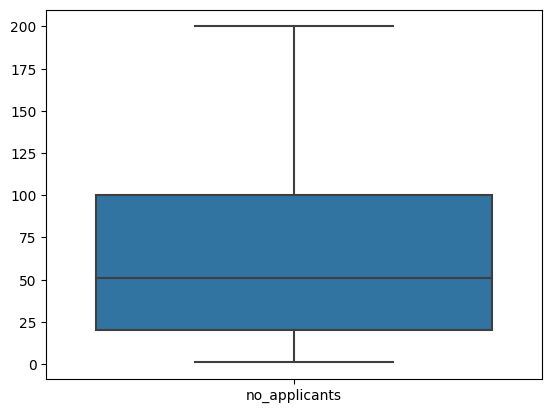

In [515]:
sns.boxplot(df_jobs)

In [ ]:
df_jobs['required_skills'].dropna().map(lambda x: eval(x)).explode().value_counts()